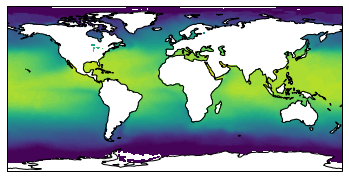

In [1]:
import os
import matplotlib.pyplot as plt
from netCDF4 import Dataset as netcdf_dataset
import numpy as np

from cartopy import config
import cartopy.crs as ccrs


# get the path of the file. It can be found in the repo data directory.
fname = os.path.join(config["repo_data_dir"],
                     'netcdf', 'HadISST1_SST_update.nc'
                     )

dataset = netcdf_dataset(fname)
sst = dataset.variables['sst'][0, :, :]
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]

ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(lons, lats, sst, 60,
             transform=ccrs.PlateCarree())

ax.coastlines()

plt.show()

In [2]:
import iris
import matplotlib.pyplot as plt

import cartopy.crs as ccrs


# load some sample iris data
fname = iris.sample_data_path('rotated_pole.nc')
temperature = iris.load_cube(fname)

# iris comes complete with a method to put bounds on a simple point
# coordinate. This is very useful...
temperature.coord('grid_latitude').guess_bounds()
temperature.coord('grid_longitude').guess_bounds()

# turn the iris Cube data structure into numpy arrays
gridlons = temperature.coord('grid_longitude').contiguous_bounds()
gridlats = temperature.coord('grid_latitude').contiguous_bounds()
temperature = temperature.data

# set up a map
ax = plt.axes(projection=ccrs.PlateCarree())

# define the coordinate system that the grid lons and grid lats are on
rotated_pole = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)
plt.pcolormesh(gridlons, gridlats, temperature, transform=rotated_pole)

ax.coastlines()

plt.show()

ModuleNotFoundError: No module named 'iris'

C:\Users\Administrator\anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


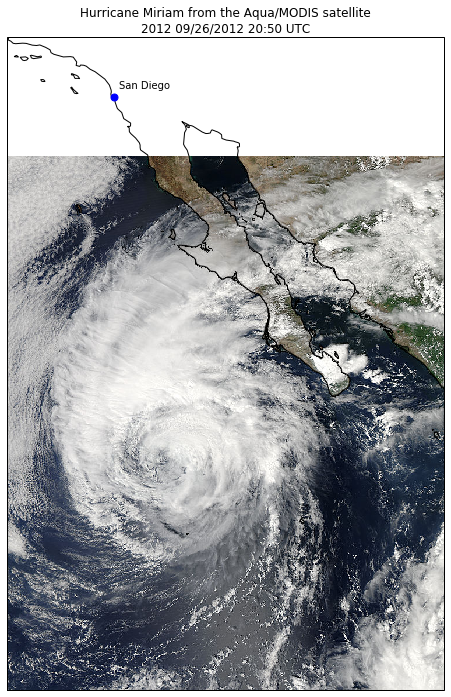

In [3]:
import os
import matplotlib.pyplot as plt

from cartopy import config
import cartopy.crs as ccrs


fig = plt.figure(figsize=(8, 12))

# get the path of the file. It can be found in the repo data directory.
fname = os.path.join(config["repo_data_dir"],
                     'raster', 'sample', 'Miriam.A2012270.2050.2km.jpg'
                     )
img_extent = (-120.67660000000001, -106.32104523100001, 13.2301484511245, 30.766899999999502)
img = plt.imread(fname)

ax = plt.axes(projection=ccrs.PlateCarree())
plt.title('Hurricane Miriam from the Aqua/MODIS satellite\n'
          '2012 09/26/2012 20:50 UTC')

# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# add the image. Because this image was a tif, the "origin" of the image is in the
# upper left corner
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)

# mark a known place to help us geo-locate ourselves
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())

plt.show()